In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
import numpy as np
import category_encoders as ce
from sklearn import svm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV

In [74]:
train_set = pd.read_csv('train_prepared.csv', encoding='utf-8')
test_set = pd.read_csv('test_prepared.csv', encoding='utf-8')

#train_fts = train_set.columns

#imputer_train = SimpleImputer()
#imputer_train.fit(train_set)
#train_set = pd.DataFrame(imputer_train.transform(train_set))

#train_set.columns = train_fts

#X_test_fts = test_set.columns

#imputer_test = SimpleImputer()
#imputer_test.fit(test_set)
#test_set = pd.DataFrame(imputer_test.transform(test_set))

#test_set.columns=X_test_fts

In [75]:
X = train_set.drop(columns=['Target', 'Opportunity_ID'])
y = train_set.Target

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=123)

clasif = svm.SVC(probability=True, gamma = 0.0001, C = 10)
#clasif.fit(X_train, y_train)

#log_loss(y_test, clasif.predict_proba(X_test))

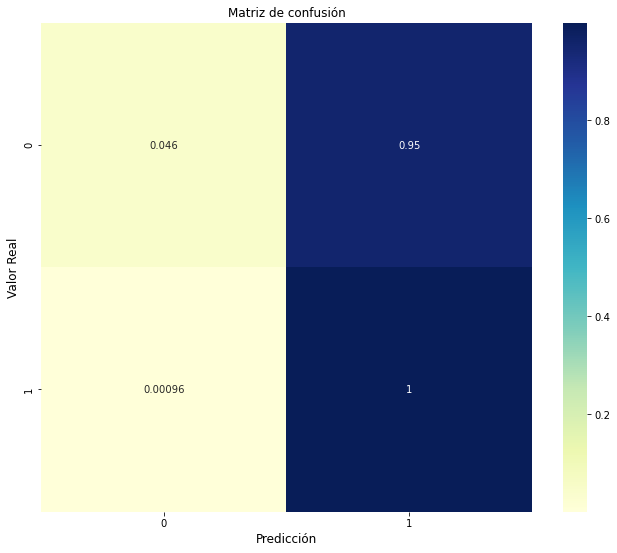

In [67]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(11, 9))
plt.title('Matriz de confusión')
sns.heatmap(confusion_matrix(y_test, clasif.predict(X_test), normalize='true'), cmap='YlGnBu', annot=True)
ax.set_xlabel('Predicción', fontsize = 12)
plt.ylabel('Valor Real', fontsize = 12)
plt.show()

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer

numeric_cols = X_train.select_dtypes(include=['int', 'float64']).columns.to_list()
#numeric_cols = ['Total_Amount_Sum_USD', 'Total_Taxable_Amount_USD']

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer()),
                            ('scaler', StandardScaler())
                        ]
                      )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols)
                        ],
                    remainder='passthrough'
                    )

In [78]:
clasif = svm.SVC(probability=True, gamma = 0.0001, C = 10)
pipe = Pipeline([('preprocessing', preprocessor),('svc',clasif)])

In [79]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Convertibility',
                                                   'Total_Amount_Sum_USD',
                                                   'Total_Taxable_Amount_USD',
                                                   'Year_Creation',
                                                   'Month_Creation',
                                                   'Year_Delivery',
                                                   'Month_Delivery',
                    

In [80]:
#params = {'C': [0.1, 1, 10, 100, 50],  
#              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
#         }

#con train

#from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#svm_clasif = svm.SVC(probability=True)

#random_search=RandomizedSearchCV(svm_clasif,params, n_iter=25,scoring='neg_log_loss',n_jobs=-1,cv=5,verbose=3)

#random_search.fit(X_train,y_train)

In [13]:
#random_search.best_params_

{'gamma': 0.0001, 'C': 10}

In [81]:
print(f1_score(y_test, pipe.predict(X_test)))
log_loss(y_test, pipe.predict_proba(X_test))

0.8114754098360655


0.47063791318687503

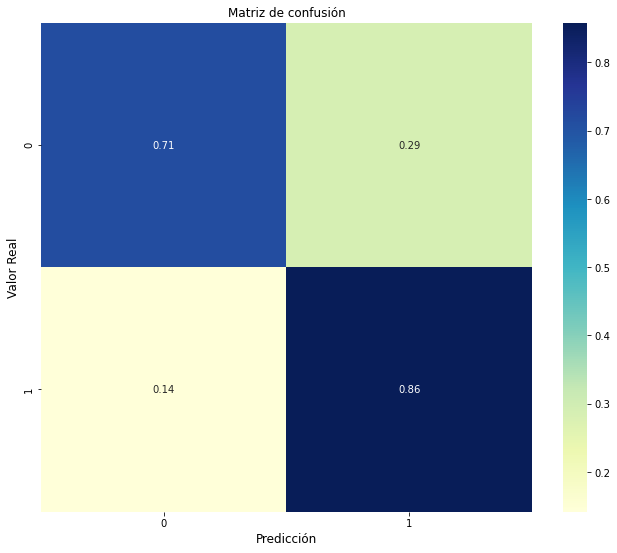

In [86]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(11, 9))
plt.title('Matriz de confusión')
sns.heatmap(confusion_matrix(y_test, pipe.predict(X_test), normalize='true'), cmap='YlGnBu', annot=True)
ax.set_xlabel('Predicción', fontsize = 12)
plt.ylabel('Valor Real', fontsize = 12)
plt.show()

In [82]:
preds = pd.DataFrame(pipe.predict_proba(test_set.drop(columns=['Opportunity_ID', 'Target']))[:, 1])
preds['Opportunity_ID'] = test_set.Opportunity_ID.to_list()
preds.columns = ['Target', 'Opportunity_ID']
preds.loc[:, ['Opportunity_ID', 'Target']].to_csv('predictions/svm_preds.csv', index=False)

In [83]:
print(f1_score(test_set.Target, round(preds.Target)))
log_loss(test_set.Target, preds.Target)

0.7627856365614799


0.5462270519810859